In [2]:
from config import nfl_key
import pandas as pd
import matplotlib.pyplot as plt
import collections as cc
from collections import defaultdict
from pprint import pprint
import requests
import json
import numpy as np
import time
from nfl import get_qb_data, get_all_qbs, explode_cols, get_pbp_stats

# SUPERBOWL LIV KC vs SF
qb_game_id = '0e00303b-ee60-4cf4-ad68-48efbe53901d'
            
#Mahomes Player_ID
mahomes_id = '11cad59d-90dd-449c-a839-dddaba4fe16c'
#Garoppolo Player_ID
garoppolo_id = '42de9d1d-0352-460b-9172-9452414fd7fd'


qb_season_stats = get_all_qbs()
qb_season_stats.head()


# qb_season_stats = rename_szn_stats_QB(qb_season_stats)

# qb_season_stats

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0042266b-cb28-4012-bfd2-06650badad97,Daniel Jones,QB,1619.0,459.0,2.788,6.595,6.0,61.874,131.0,...,26,7,5,2,-7,2,279,43,18,11
8,1c6daf8e-d6dc-4d88-a5fa-c3ebcd93a6e5,Alex Tanney,QB,1.0,1.0,2.900,1.000,0.0,100.000,1.0,...,0,0,0,0,0,0,0,0,0,0
30,6cb6226e-f08c-4192-95f1-69709ed686c6,Eli Manning,QB,625.0,147.0,2.416,7.088,4.0,61.905,37.0,...,6,0,1,0,0,0,7,2,3,1
16,3c8a55dd-20a8-4375-b711-49eb5e6e1d0e,Taysom Hill,QB,43.0,6.0,2.723,9.167,0.0,50.000,1.0,...,30,30,6,5,-19,1,156,49,0,0
58,bb5957e6-ce7d-47ab-8036-22191ffc1c44,Drew Brees,QB,1488.0,378.0,2.444,7.881,4.0,74.339,114.0,...,2,1,1,0,0,1,-4,0,0,0


In [3]:
qb_season_stats = qb_season_stats.loc[qb_season_stats[2] == 'QB']
#qb_season_stats

In [4]:
qb_season_stats.rename(columns = {0:  'Player ID',
                                    1:  'Name',
                                    2:  'Position',
                                    #passing
                                    3:  'Air Yards',
                                    4:  'Passing Yards',
                                    5:  'Avg Pocket Time',
                                    6:  'Yards Per Pass',
                                    7:  'Batted Passes',
                                    8:  'Completion Percentage',
                                    9:  'Times Blizted',
                                    10: 'Completions',
                                    11: 'Passes Defended',
                                    12: 'Dropped Passes',
                                    13: 'Gross Yards',
                                    14: 'Hurries',
                                    15: 'Interceptions',
                                    16: 'Knockdowns',
                                    17: 'Longest Completion',
                                    18: 'Longest Touchdown Pass',
                                    19: 'Net Yards Passing',
                                    20: 'On Target Throws',
                                    21: 'Total Seconds in Pocket',
                                    22: 'Poor Throws',
                                    23: 'Rating',
                                    24: 'Redzone Passing Attempts',
                                    25: 'Sacked Yards',
                                    26: 'Times Sacked',
                                    27: 'Spikes',
                                    28: 'Throw Aways',
                                    29: 'Passing Touchdowns',
                                    30: 'Yards',
                                    #rushing
                                    31: 'Scrambles',
                                    32: 'Rushing Attempts',
                                    33: 'Yards Per Rush',
                                    34: 'Broken Tackles',
                                    35: 'Kneel Downs',
                                    36: 'Longest Rush',
                                    37: 'Longest TD Run',
                                    38: 'Redzone Rushing Attempts',
                                    39: 'Negative Rushes',
                                    40: 'Yards Lost Rushing',
                                    41: 'Rushing Touchdowns',
                                    42: 'Total Rushing Yards',
                                    43: 'Yards After Contact',
                                    #fumbles
                                    44: 'Fumbles',
                                    45: 'Fumbles Lost'}, inplace=True)
     
qb_season_stats.head()

,Player ID,Name,Position,Air Yards,Passing Yards,Avg Pocket Time,Yards Per Pass,Batted Passes,Completion Percentage,Times Blizted,...,Longest Rush,Longest TD Run,Redzone Rushing Attempts,Negative Rushes,Yards Lost Rushing,Rushing Touchdowns,Total Rushing Yards,Yards After Contact,Fumbles,Fumbles Lost
0,0042266b-cb28-4012-bfd2-06650badad97,Daniel Jones,QB,1619.0,459.0,2.788,6.595,6.0,61.874,131.0,...,26,7,5,2,-7,2,279,43,18,11
8,1c6daf8e-d6dc-4d88-a5fa-c3ebcd93a6e5,Alex Tanney,QB,1.0,1.0,2.900,1.000,0.0,100.000,1.0,...,0,0,0,0,0,0,0,0,0,0
30,6cb6226e-f08c-4192-95f1-69709ed686c6,Eli Manning,QB,625.0,147.0,2.416,7.088,4.0,61.905,37.0,...,6,0,1,0,0,0,7,2,3,1
16,3c8a55dd-20a8-4375-b711-49eb5e6e1d0e,Taysom Hill,QB,43.0,6.0,2.723,9.167,0.0,50.000,1.0,...,30,30,6,5,-19,1,156,49,0,0
58,bb5957e6-ce7d-47ab-8036-22191ffc1c44,Drew Brees,QB,1488.0,378.0,2.444,7.881,4.0,74.339,114.0,...,2,1,1,0,0,1,-4,0,0,0


## Top 15 QBs w/ Most Passing Touchdowns

In [5]:
all_qbs_df = qb_season_stats[['Name',
                              'Rating',
                              'Redzone Passing Attempts',
                              'Passing Touchdowns',
                              'Air Yards',
                              'On Target Throws',
                              'Completion Percentage']]

all_qbs_df = all_qbs_df.sort_values('Passing Touchdowns', ascending= False)
top_qbs_df = all_qbs_df[(all_qbs_df['Passing Touchdowns']>22)]

top_qbs_df


,Name,Rating,Redzone Passing Attempts,Passing Touchdowns,Air Yards,On Target Throws,Completion Percentage
60,Lamar Jackson,113.3,60.0,36.0,1767.0,295.0,66.085
71,Jameis Winston,84.3,69.0,33.0,3249.0,421.0,60.703
16,Russell Wilson,106.3,89.0,31.0,2402.0,376.0,66.085
35,Dak Prescott,99.7,61.0,30.0,2984.0,451.0,65.101
15,Jimmy Garoppolo,102.0,73.0,27.0,1819.0,377.0,69.118
58,Drew Brees,116.3,56.0,27.0,1488.0,306.0,74.339
77,Carson Wentz,93.1,69.0,27.0,2235.0,431.0,63.921
64,Deshaun Watson,98.0,59.0,26.0,2166.0,367.0,67.273
30,Matt Ryan,92.1,81.0,26.0,2816.0,443.0,66.234
6,Patrick Mahomes II,105.3,56.0,26.0,2076.0,359.0,65.909


In [7]:
avg_rdz_df = all_qbs_df["Redzone Passing Attempts"].mean()
avg_td_df = all_qbs_df["Passing Touchdowns"].mean()
print(f"Average number of Redzone passing attempts by QB = {avg_rdz_df}")
print(f"Average number of Passing Touchdowns by QB = {avg_td_df}")

Average number of Redzone passing attempts by QB = 32.16417910447761
Average number of Passing Touchdowns by QB = 11.477611940298507


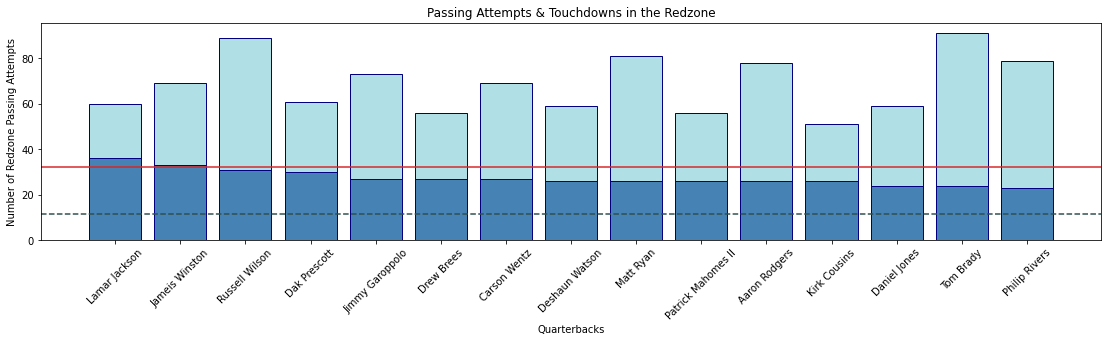

In [8]:
fig,ax = plt.subplots(figsize=(19,4))

ax.bar(top_qbs_df["Name"],top_qbs_df["Redzone Passing Attempts"], color='powderblue', edgecolor='navy');
ax.bar(top_qbs_df["Name"],top_qbs_df["Passing Touchdowns"], color='steelblue', edgecolor='navy');
ax.set_ylabel("Number of Redzone Passing Attempts")
ax.set_xlabel("Quarterbacks")
ax.set_title('Passing Attempts & Touchdowns in the Redzone')
ax.tick_params(axis='x', labelrotation = 45)
ax.axhline(avg_rdz_df, color='tab:red')
ax.axhline(avg_td_df, color='darkslategrey', linestyle='dashed')

### Top 5 QBs Redzone Targets

In [9]:
redzone_qbs_df = qb_season_stats[['Name', 'Redzone Passing Attempts']]
redzone_qbs_df = redzone_qbs_df.sort_values('Redzone Passing Attempts', ascending= False)
redzone_qbs_df.head()

,Name,Redzone Passing Attempts
21,Tom Brady,91.0
16,Russell Wilson,89.0
30,Matt Ryan,81.0
62,Philip Rivers,79.0
4,Aaron Rodgers,78.0


### Top 5 QBs Passing Touchdowns

In [10]:
redzone_qbs_df = qb_season_stats[['Name', 'Passing Touchdowns']]
redzone_qbs_df = redzone_qbs_df.sort_values('Passing Touchdowns', ascending= False)
redzone_qbs_df.head()

,Name,Passing Touchdowns
60,Lamar Jackson,36.0
71,Jameis Winston,33.0
16,Russell Wilson,31.0
35,Dak Prescott,30.0
15,Jimmy Garoppolo,27.0


### Top 5 QBs w/ Best Redzone Conversion Rate

In [25]:
best_qbs_df = qb_season_stats[['Name', 'Passing Touchdowns', 'Redzone Passing Attempts']]
best_qbs_df['Redzone/TD Conversion Rate'] = ((best_qbs_df['Passing Touchdowns'] / best_qbs_df['Redzone Passing Attempts'])*100).round(2).astype(str) + '%'
best_qbs_df = best_qbs_df[(best_qbs_df['Passing Touchdowns']>20)]
best_qbs_df = best_qbs_df.sort_values('Redzone/TD Conversion Rate', ascending= False)
best_qbs_df.head()

<ipython-input-25-e19f17aafdf3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_qbs_df['Redzone/TD Conversion Rate'] = ((best_qbs_df['Passing Touchdowns'] / best_qbs_df['Redzone Passing Attempts'])*100).round(2).astype(str) + '%'


,Name,Passing Touchdowns,Redzone Passing Attempts,Redzone/TD Conversion Rate
60,Lamar Jackson,36.0,60.0,60.0%
25,Ryan Tannehill,22.0,37.0,59.46%
49,Kirk Cousins,26.0,51.0,50.98%
35,Dak Prescott,30.0,61.0,49.18%
58,Drew Brees,27.0,56.0,48.21%


# Superbowl LIV : QB Play-By-Play Statistics

## #15 Patrick Mahomes II, Kansas City Chiefs

Below are the 4th Quarter Play-By-Play statistics for Mahomes

In [26]:
quarterback_df = get_pbp_stats(qb_game_id, mahomes_id)

qb_df = quarterback_df[['attempt', 'inside_20','touchdown', 'on_target_throw', 'complete', 'firstdown', 'incompletion_type']]
qb_df

11cad59d-90dd-449c-a839-dddaba4fe16c


,attempt,inside_20,touchdown,on_target_throw,complete,firstdown,incompletion_type
0,1.0,0.0,NaN,0.0,0.0,0.0,Pass Defended
5,1.0,0.0,NaN,1.0,1.0,1.0,None
9,1.0,0.0,NaN,1.0,1.0,1.0,None
13,NaN,0.0,NaN,0.0,NaN,0.0,None
15,1.0,0.0,NaN,NaN,NaN,0.0,None
19,1.0,0.0,NaN,1.0,NaN,0.0,Dropped Pass
51,1.0,0.0,NaN,NaN,NaN,1.0,None
54,1.0,0.0,NaN,1.0,1.0,0.0,None
62,1.0,0.0,NaN,1.0,0.0,0.0,Pass Defended
65,1.0,0.0,NaN,0.0,0.0,0.0,Poorly Thrown


### Patrick M - Superbowl LIV 4th Qtr Summary

In [27]:
m_attempt_count = qb_df["attempt"].count()
m_completions = qb_df["complete"].sum()
m_on_target_count = qb_df["on_target_throw"].sum()

m_times_in_redzone = qb_df["inside_20"].sum()
m_redzone_tds = qb_df["touchdown"].sum()





m_redzone_cvn_percentage = "{:.2%}".format(m_redzone_tds / m_times_in_redzone)

m_completion_percentage = "{:.2%}".format(m_completions / m_attempt_count)

m_on_target_percentage = "{:.2%}".format(m_on_target_count / m_attempt_count)


mahomes_summary_df = pd.DataFrame({"Total Passing Attempts": [m_attempt_count],
                            "Completion Percentage": m_completion_percentage,
                            "On Target Percentage": m_on_target_percentage,
                            "Redzone TD Percentage": m_redzone_cvn_percentage})
mahomes_summary_df



,Total Passing Attempts,Completion Percentage,On Target Percentage,Redzone TD Percentage
0,24,41.67%,50.00%,50.00%


## #10 Jimmy Garoppolo, San Fransisco 49ers

Below are the 4th Quarter Play-By-Play statistics for Garoppolo

In [28]:
quarterback_df = get_pbp_stats(qb_game_id, garoppolo_id)

qb_df = quarterback_df[['attempt', 'inside_20','touchdown', 'on_target_throw', 'complete', 'firstdown', 'incompletion_type']]
qb_df

42de9d1d-0352-460b-9172-9452414fd7fd


,attempt,inside_20,touchdown,on_target_throw,complete,firstdown,incompletion_type
27,1.0,0.0,NaN,1.0,1.0,1.0,None
36,1.0,0.0,NaN,0.0,0.0,0.0,Poorly Thrown
42,1.0,0.0,NaN,NaN,NaN,0.0,None
93,1.0,0.0,NaN,0.0,0.0,0.0,Pass Defended
100,1.0,0.0,NaN,0.0,0.0,0.0,Poorly Thrown
145,1.0,0.0,NaN,1.0,1.0,0.0,None
149,1.0,0.0,NaN,1.0,1.0,1.0,None
154,1.0,0.0,NaN,0.0,0.0,0.0,Pass Defended
158,1.0,0.0,NaN,1.0,0.0,0.0,Pass Defended
164,1.0,0.0,NaN,0.0,0.0,0.0,Poorly Thrown


### Jimmy G - Superbowl LIV 4th Qtr Summary

In [29]:
g_attempt_count = qb_df["attempt"].count()
g_completions = qb_df["complete"].sum()
g_on_target_count = qb_df["on_target_throw"].sum()

g_times_in_redzone = qb_df["inside_20"].sum()
g_redzone_tds = qb_df["touchdown"].count()





g_redzone_cvn_percentage = "{:.2%}".format(g_redzone_tds / g_times_in_redzone)

g_completion_percentage = "{:.2%}".format(g_completions / g_attempt_count)

g_on_target_percentage = "{:.2%}".format(g_on_target_count / g_attempt_count)


garoppolo_summary_df = pd.DataFrame({"Total Passing Attempts": [g_attempt_count],
                            "Completion Percentage": g_completion_percentage,
                            "On Target Percentage": g_on_target_percentage,
                            "Redzone TD Percentage": [g_redzone_tds]})
garoppolo_summary_df

<ipython-input-29-4a8d24a3e5f7>:12: RuntimeWarning: invalid value encountered in true_divide
  g_redzone_cvn_percentage = "{:.2%}".format(g_redzone_tds / g_times_in_redzone)


,Total Passing Attempts,Completion Percentage,On Target Percentage,Redzone TD Percentage
0,12,25.00%,41.67%,0


# Superbowl LIV : QB 4th Quarter Pass Attempt Comparison

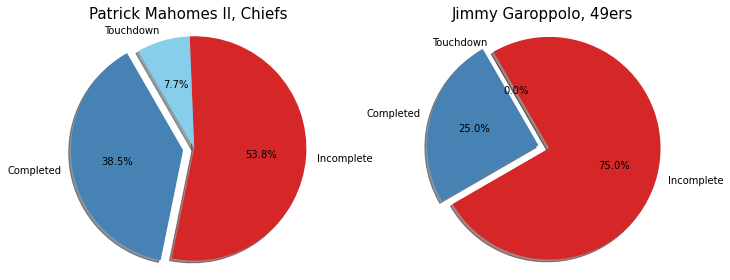

In [30]:
pass_attempts = ["Completed", "Incomplete", "Touchdown"]
m_counts = [m_completions, 14 ,m_redzone_tds]
g_counts = [g_completions, 9 ,g_redzone_tds]
colors = ["steelblue", "tab:red", "skyblue"]
explode = (0.1,0,0)

fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
ax1.pie(m_counts, explode=explode, labels=pass_attempts, autopct='%1.1f%%',colors=colors,
        shadow=True, startangle=120)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Patrick Mahomes II, Chiefs', fontsize=15)



ax2.pie(g_counts, explode=explode, labels=pass_attempts, autopct='%1.1f%%',colors=colors,
        shadow=True, startangle=120)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('Jimmy Garoppolo, 49ers', fontsize=15)


plt.tight_layout()
plt.show()